## Import module

In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Preprocessing

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print('jumlah data train = ',train_images.shape[0])
print('jumlah data test = ',test_images.shape[0])

jumlah data train =  60000
jumlah data test =  10000


In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names_inv = ["Ankle boot","Bag","Sneaker","Shirt","Sandal","Coat","Dress","Pullover","Trouser","T-shirt/top"]

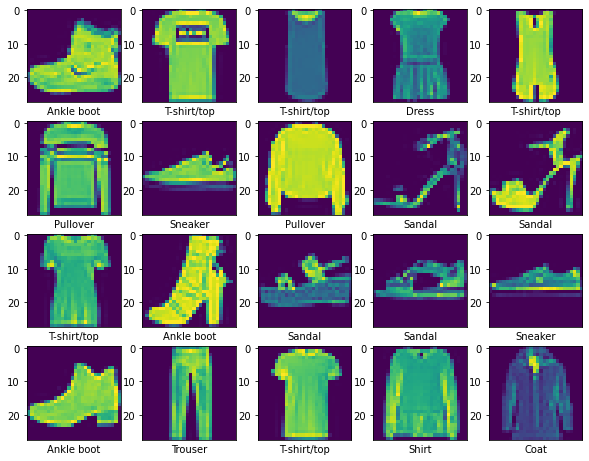

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
trainX = train_images.reshape((train_images.shape[0], 28, 28, 1))
testX = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels,10)
# y_valid = (validation_labels,10)
y_test = (test_labels,10)

## Modeling

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential() #model = sequential
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 28)                151452    
                                                                 
 dropout_1 (Dropout)         (None, 28)                0         
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(trainX, y_train, epochs=3, verbose=1, validation_split=0.2, batch_size=16)

Epoch 1/3
3000/3000 [==============================] - 67s 22ms/step - loss: 0.8875 - accuracy: 0.6572 - val_loss: 0.4369 - val_accuracy: 0.8492
Epoch 2/3
3000/3000 [==============================] - 45s 15ms/step - loss: 0.6955 - accuracy: 0.7360 - val_loss: 0.3888 - val_accuracy: 0.8704
Epoch 3/3
3000/3000 [==============================] - 44s 15ms/step - loss: 0.6185 - accuracy: 0.7663 - val_loss: 0.3735 - val_accuracy: 0.8728


In [ ]:
from keras.models import load_model

model.save('cnn_fmnist.h5')
model = load_model('cnn_fmnist.h5')

## Prediction

In [ ]:
predictions = model.predict(testX)
predictions = np.argmax(predictions,-1)
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_predict = []
y_true = []

for i in range(0,len(predictions)):
  y_pred = class_names[predictions[i]]
  y_tru = class_names[test_labels[i]]
  y_predict.append(y_pred)
  y_true.append(y_tru)

In [ ]:
print(classification_report(y_predict, y_true))
print(accuracy_score(y_predict, y_true))
confusion_matrix(y_predict, y_true)

              precision    recall  f1-score   support

  Ankle boot       0.95      0.95      0.95       991
         Bag       0.96      0.97      0.97       984
        Coat       0.70      0.84      0.76       841
       Dress       0.87      0.89      0.88       974
    Pullover       0.83      0.76      0.79      1105
      Sandal       0.96      0.98      0.97       988
       Shirt       0.62      0.59      0.61      1059
     Sneaker       0.95      0.92      0.94      1027
 T-shirt/top       0.84      0.80      0.82      1045
     Trouser       0.97      0.98      0.97       986

    accuracy                           0.86     10000
   macro avg       0.86      0.87      0.87     10000
weighted avg       0.87      0.86      0.86     10000

0.865


array([[946,   1,   0,   0,   0,   8,   0,  36,   0,   0],
       [  1, 959,   0,   2,   1,   1,  11,   1,   7,   1],
       [  0,   2, 703,  22,  44,   0,  61,   0,   1,   8],
       [  0,   4,  35, 867,   6,   0,  22,   0,  23,  17],
       [  0,   6, 137,   5, 835,   0, 110,   0,  12,   0],
       [  5,   2,   0,   0,   0, 965,   0,  14,   2,   0],
       [  0,  18, 122,  71, 102,   0, 623,   0, 117,   6],
       [ 48,   4,   0,   0,   0,  26,   0, 949,   0,   0],
       [  0,   2,   1,  21,  11,   0, 173,   0, 836,   1],
       [  0,   2,   2,  12,   1,   0,   0,   0,   2, 967]])

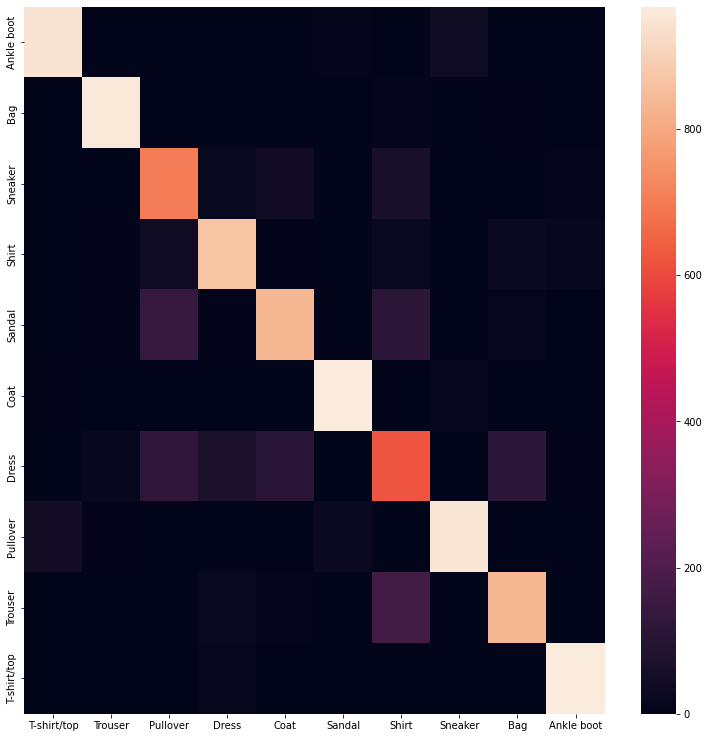

In [ ]:
import seaborn as sn
ax = plt.figure(figsize=(13,13))
ax= plt.subplot()
cm = confusion_matrix(y_predict, y_true)
sn.heatmap(cm, ax=ax)
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names_inv);

In [ ]:
h = [class_names[x] for x in predictions]

hasil = pd.DataFrame(h,columns=['prediksi'])
hasil.head()

,prediksi
0,Ankle boot
1,Pullover
2,Trouser
3,Trouser
4,Shirt
